In [ ]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2

from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
import tensorflow as tf

# Check if GPU is available
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

# Explicitly enable GPU (Colab usually does this by default)
tf.device('/GPU:0')

GPU is available


In [ ]:
# Transform to resize and convert to tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
dataset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

# Extract 5000 grayscale images and labels
images = []
labels = []
for i, (img, label) in enumerate(data_loader):
    if i >= 5000:
        break
    gray = (img[0].numpy().squeeze() * 255).astype(np.uint8)
    images.append(gray)
    labels.append(label.item())

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 197kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.73MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 22.6MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

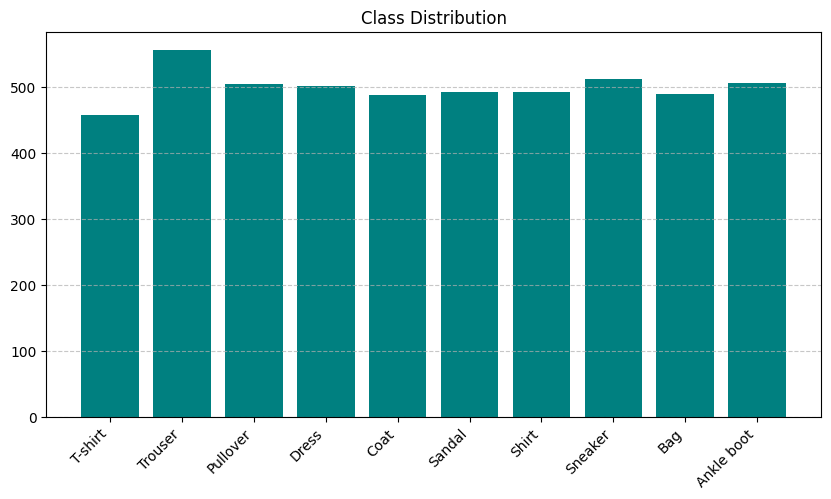

In [ ]:
# Calculate class distribution
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
label_counts = Counter(labels)  # Your 5000 labels

# Plotting
plt.figure(figsize=(10, 5))
bars = plt.bar(class_names, [label_counts[i] for i in range(10)], color='teal')
plt.xticks(rotation=45, ha='right')
plt.title(f'Class Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
images = np.stack(images).squeeze()  # (5000,28,28)
images = images[..., np.newaxis]  # (5000,28,28,1)
images = images.astype('float32') / 255.0  # Normalize to [0,1]
labels = np.array(labels)


In [ ]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

In [ ]:
# 3. Train-test split (4000/1000)
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=1000, stratify=labels, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=800, stratify=y_train, random_state=42)


Training 1-layer model...
Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.5200 - loss: 1.5396 - val_accuracy: 0.4300 - val_loss: 1.6559
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7615 - loss: 0.6950 - val_accuracy: 0.3575 - val_loss: 1.7813
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8227 - loss: 0.4966 - val_accuracy: 0.3950 - val_loss: 1.8514
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8637 - loss: 0.3909 - val_accuracy: 0.4462 - val_loss: 1.6796
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8876 - loss: 0.3282 - val_accuracy: 0.5450 - val_loss: 1.4771
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9042 - loss: 0.2667 - val_accuracy: 0.6125 - val_loss: 1.1603
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9126 - loss: 0.2509 - val_accuracy: 0.6837 - val_loss: 1.0009
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9344 - loss: 0.1899 - val_

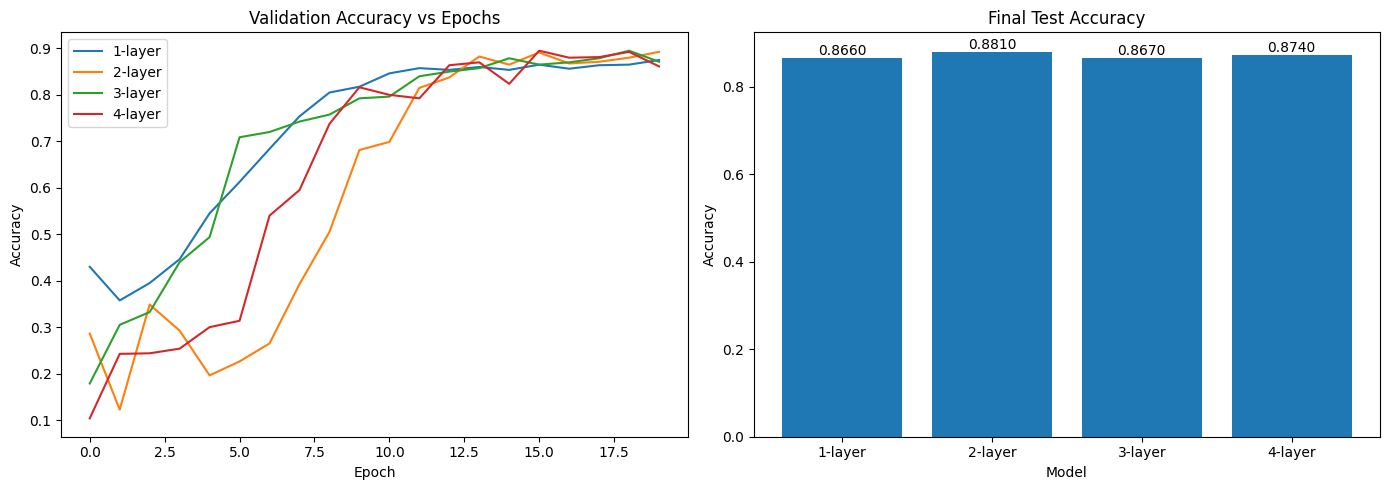

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense


models = {
    '1-layer': [
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Flatten()
    ],
    '2-layer': [
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.4),
        Flatten()
    ],
    '3-layer': [
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.4),
        Conv2D(64, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.4),
        Flatten()
    ],
    '4-layer': [
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.4),
        Conv2D(64, 3, padding='same', activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Conv2D(128, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(2),
        Dropout(0.4),
        Flatten()
    ]
}

# Training and evaluation
histories = {}
test_accuracies = {}

for name, layers in models.items():
    print(f"\nTraining {name} model...")
    model = Sequential(layers)

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=64,
        verbose=1
    )

    # Store history
    histories[name] = history

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies[name] = test_acc
    print(f"{name} test accuracy: {test_acc:.4f}")

# Plotting
plt.figure(figsize=(14, 5))

# Epochs vs Validation Accuracy
plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.ylim(0.5, 1)  # Zoomed-in y-axis
plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Epochs vs Test Accuracy (final)
plt.subplot(1, 2, 2)
x = list(test_accuracies.keys())
y = list(test_accuracies.values())
plt.bar(x, y)
plt.ylim(0.6, 1)  # Zoomed-in y-axis
plt.title('Final Test Accuracy (Zoomed)')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Label bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
def build_model(num_conv_layers):
    model = Sequential()
    model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(BatchNormalization())

    for i in range(1, num_conv_layers):
        filters = min(32 * (2 ** i), 256)  # Cap at 256
        model.add(Conv2D(filters, 3, padding='same', activation='relu'))
        model.add(BatchNormalization())

        if (i+1) % 2 == 0:  # Pool every 2 conv layers
            model.add(MaxPool2D(2))
            model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # model.compile(optimizer='adam',
    #              loss='sparse_categorical_crossentropy',
    #              metrics=['accuracy'])
    return model


In [ ]:
# #
# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',  # Track validation loss
#     patience=3,         # Stop after 3 epochs without improvement
#     restore_best_weights=True  # Revert to best model if early stopping triggers
# )


In [ ]:
results = {}
for layers in [2, 3, 4, 5,6]:
    print(f"\n{'='*40}")
    print(f"=== Training {layers}-layer model ===")
    print(f"{'='*40}")

    # Model building
    print("\n[1] Building model architecture...")
    model = build_model(layers)
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    model.summary()  # Print model architecture

    # Training
    print("\n[2] Starting training...")
    print(f"Training samples: {len(X_train)} | Validation samples: {len(X_val)}")
    print(f"Batch size: 64 ")

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=64,
        #callbacks=[early_stop],
        verbose=1
    )

    # Store results
    results[layers] = history

    # Training summary
    best_epoch = np.argmin(history.history['val_loss']) + 1
    print(f"\n[3] Training completed for {layers}-layer model:")
    #print(f"- Stopped at epoch: {len(history.history['loss'])}/{15}")
    #print(f"- Best epoch: {best_epoch} (val_loss: {min(history.history['val_loss']):.4f})")
    print(f"- Final training accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"- Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")



=== Training 2-layer model ===

[1] Building model architecture...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,250 (6.20 MB)

 Trainable params: 1,626,058 (6.20 MB)

 Non-trainable params: 192 (768.00 B)


[2] Starting training...
Training samples: 3200 | Validation samples: 800
Batch size: 64 
Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6009 - loss: 2.0865 - val_accuracy: 0.2250 - val_loss: 2.1474
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8391 - loss: 0.4530 - val_accuracy: 0.1800 - val_loss: 4.5193
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9018 - loss: 0.2715 - val_accuracy: 0.1850 - val_loss: 6.3909
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9220 - loss: 0.2247 - val_accuracy: 0.1900 - val_loss: 7.5139
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9385 - loss: 0.1853 - val_accuracy: 0.2237 - val_loss: 7.6399
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9587 - loss: 0.1036 - val_accuracy: 0.2575 - val_loss: 7.2353
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9658 - loss: 0.0899 - val_accuracy: 0.3512 - val_loss: 5.6989
Epoch 8/20
50/50 ━━━━━━━━━

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,250 (12.61 MB)

 Trainable params: 3,305,802 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)


[2] Starting training...
Training samples: 3200 | Validation samples: 800
Batch size: 64 
Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.6401 - loss: 1.4729 - val_accuracy: 0.1600 - val_loss: 2.6310
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8706 - loss: 0.3699 - val_accuracy: 0.2450 - val_loss: 3.6762
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9162 - loss: 0.2390 - val_accuracy: 0.1813 - val_loss: 6.2957
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9479 - loss: 0.1414 - val_accuracy: 0.1338 - val_loss: 9.5328
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9476 - loss: 0.1174 - val_accuracy: 0.1937 - val_loss: 11.2636
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9839 - loss: 0.0549 - val_accuracy: 0.2700 - val_loss: 10.3309
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9896 - loss: 0.0395 - val_accuracy: 0.4462 - val_loss: 7.6346
Epoch 8/20
50/50 ━━━

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,996,810 (7.62 MB)

 Trainable params: 1,995,850 (7.61 MB)

 Non-trainable params: 960 (3.75 KB)


[2] Starting training...
Training samples: 3200 | Validation samples: 800
Batch size: 64 
Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.5639 - loss: 2.7778 - val_accuracy: 0.1013 - val_loss: 2.7350
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8227 - loss: 0.5050 - val_accuracy: 0.1937 - val_loss: 2.6820
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8394 - loss: 0.4633 - val_accuracy: 0.1013 - val_loss: 3.8498
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8879 - loss: 0.3117 - val_accuracy: 0.1025 - val_loss: 4.0764
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8993 - loss: 0.2661 - val_accuracy: 0.2400 - val_loss: 3.0809
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9085 - loss: 0.2470 - val_accuracy: 0.2125 - val_loss: 3.5559
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9321 - loss: 0.1744 - val_accuracy: 0.5725 - val_loss: 2.1535
Epoch 8/20
50/50 ━━━

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,914 (9.87 MB)

 Trainable params: 2,586,442 (9.87 MB)

 Non-trainable params: 1,472 (5.75 KB)


[2] Starting training...
Training samples: 3200 | Validation samples: 800
Batch size: 64 
Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.6276 - loss: 1.2754 - val_accuracy: 0.0975 - val_loss: 2.8259
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8382 - loss: 0.4533 - val_accuracy: 0.1025 - val_loss: 5.5416
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8743 - loss: 0.3534 - val_accuracy: 0.1200 - val_loss: 3.6393
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8819 - loss: 0.3013 - val_accuracy: 0.1813 - val_loss: 8.3667
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9176 - loss: 0.2168 - val_accuracy: 0.3575 - val_loss: 3.0087
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9321 - loss: 0.1828 - val_accuracy: 0.4512 - val_loss: 2.1673
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9317 - loss: 0.1870 - val_accuracy: 0.4787 - val_loss: 1.8873
Epoch 8/20
50/50 ━━

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_77          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_78          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_79          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,868,298 (7.13 MB)

 Trainable params: 1,866,314 (7.12 MB)

 Non-trainable params: 1,984 (7.75 KB)


[2] Starting training...
Training samples: 3200 | Validation samples: 800
Batch size: 64 
Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.5637 - loss: 1.6998 - val_accuracy: 0.1575 - val_loss: 2.8233
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7940 - loss: 0.5441 - val_accuracy: 0.1013 - val_loss: 4.1423
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8364 - loss: 0.4404 - val_accuracy: 0.1775 - val_loss: 4.9800
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8613 - loss: 0.3823 - val_accuracy: 0.1562 - val_loss: 5.8161
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8975 - loss: 0.2911 - val_accuracy: 0.1787 - val_loss: 4.9544
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8921 - loss: 0.2815 - val_accuracy: 0.2825 - val_loss: 2.7479
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9170 - loss: 0.2227 - val_accuracy: 0.1963 - val_loss: 3.5673
Epoch 8/20
50/50 ━━

In [ ]:
# --- 6. Evaluate on Test Set ---
print("\n=== Final Test Performance ===")
for layers, history in results.items():
    model = build_model(layers)
    model.set_weights(history.model.get_weights())  # Load best weights
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{layers}-layer model | Test Accuracy: {test_acc:.4f}")


=== Final Test Performance ===
2-layer model | Test Accuracy: 0.8870
3-layer model | Test Accuracy: 0.8620
4-layer model | Test Accuracy: 0.8790
5-layer model | Test Accuracy: 0.8730
6-layer model | Test Accuracy: 0.8720


In [ ]:
# --- 7. Plot Learning Curves ---
plt.figure(figsize=(12,5))
for layers, history in results.items():
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['accuracy'], '--', label=f'{layers}L Train')
    plt.plot(epochs, history.history['val_accuracy'], '-', label=f'{layers}L Val')

plt.title('Training/Validation Accuracy by Model Depth')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()